In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
df.isna().sum()

#Passengers    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**We need to transform our month column to date**

In [5]:
df["Month"]=pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)

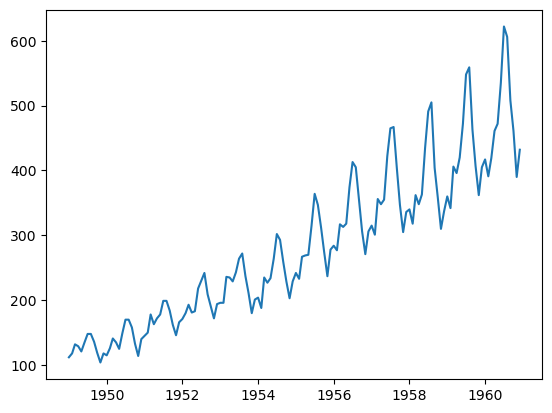

In [6]:
plt.plot(df["#Passengers"])

**A clear upward trend and seasonality in each year**

**we knnow the data is not staionary from the plot , but let's apply the adf test**

In [7]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_=adfuller(df)
print(pvalue)

0.991880243437641


**Non stationary at all**

**It is time to decompose the data to look closely at trend , seasonality and residuals**

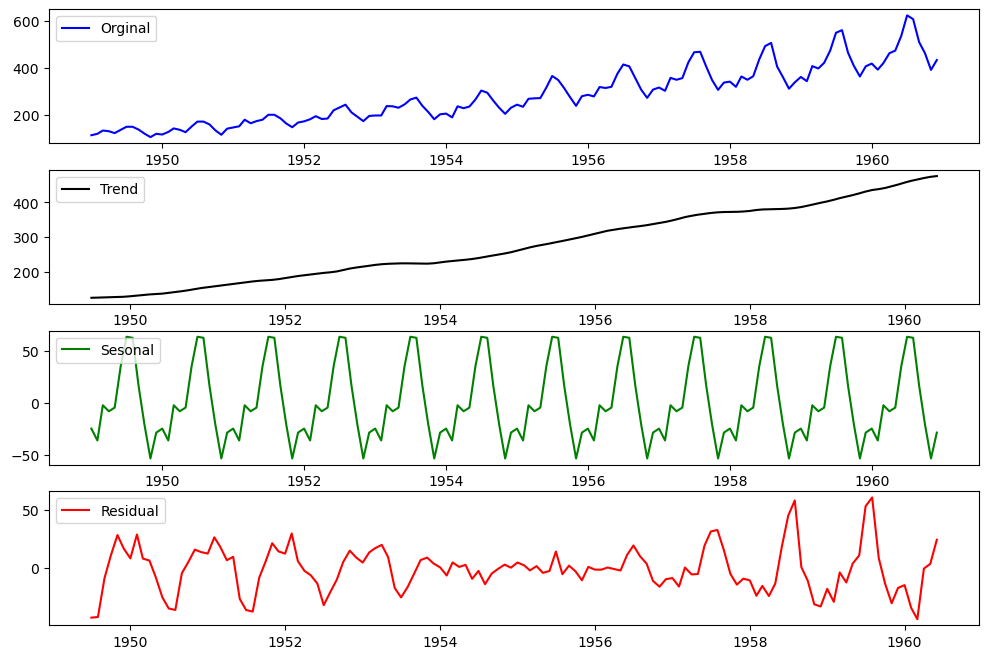

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(df["#Passengers"],
                             model='additive'
                            
                             )
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df["#Passengers"],label="Orginal",color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='black')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

**ok a clear trend and seasonality , but the residuals still have unknown pattern !**

**let's try the mutliplicative**

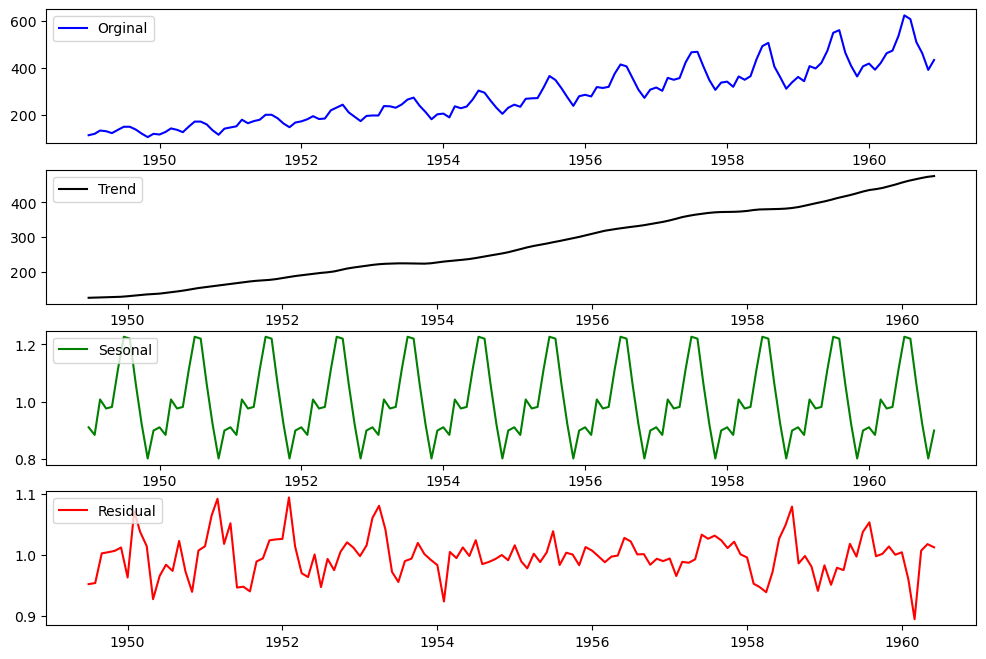

In [16]:
decomposed1=seasonal_decompose(df["#Passengers"],
                             model='mutliplicative'
                            
                             )
trend1=decomposed1.trend
sesonal1=decomposed1.seasonal
residual1=decomposed1.resid
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df["#Passengers"],label="Orginal",color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend1,label="Trend",color='black')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal1,label="Sesonal",color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual1,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

**no big difference**

**luckily we have AutoArima**

In [8]:
!pip install pmdarima
from pmdarima.arima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.0 MB/s eta 0:00:00a 0:00:01


In [9]:
arima_model=auto_arima(df["#Passengers"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.26 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.27 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.30 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.40 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [11]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 06 Jun 2023   AIC                           1019.178
Time:                                     14:19:38   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
size = int(len(df) * 0.66)
X_train = df.iloc[:size]
X_test = df.iloc[size:]

**We had to split using this way as the test set must be in the future**

**a better model to deal with seasonality which is clear in this data is SARIMAX**

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
model=SARIMAX(X_train["#Passengers"],
             order=(0,1,1),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18325D+00    |proj g|=  8.53320D-02

At iterate    5    f=  3.17656D+00    |proj g|=  1.41381D-02

At iterate   10    f=  3.16650D+00    |proj g|=  2.35312D-02

At iterate   15    f=  3.16207D+00    |proj g|=  1.13076D-02

At iterate   20    f=  3.16104D+00    |proj g|=  1.78164D-03

At iterate   25    f=  3.16079D+00    |proj g|=  1.05809D-03

At iterate   30    f=  3.16073D+00    |proj g|=  8.69145D-04

At iterate   35    f=  3.16072D+00    |proj g|=  6.82962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Tue, 06 Jun 2023   AIC                            610.537
Time:                                    14:47:39   BIC                            622.571
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3201      0.103     -3.103      0.002      -0.522      -0.118
ar.S.L12       0.6847      0.609      1.124      0.261      -0.509       1.878
ar.S.L24       0.3142      0.125      2.520      0.012       0.070       0.559
ma.S.L12      -0.9812      5.431     -0.181      0.857     -11.626       9.664
sigma2        78.6460    379.218      0.207      0.836    -664.607     821.899
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Not the best P-value but it is the best we can get**

In [20]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1949-01-01      0.000000
1949-02-01    111.998298
1949-03-01    117.999818
1949-04-01    131.999574
1949-05-01    129.000091
                 ...    
1956-07-01    419.543859
1956-08-01    398.687816
1956-09-01    365.414676
1956-10-01    320.670003
1956-11-01    274.819838
Freq: MS, Name: predicted_mean, Length: 95, dtype: float64

In [21]:
st_index=len(X_train)
ed_index=len(df)-1
predction=result.predict(st_index,ed_index)
predction

1956-12-01    311.113955
1957-01-01    320.267623
1957-02-01    310.945643
1957-03-01    351.862586
1957-04-01    349.886437
1957-05-01    355.071049
1957-06-01    411.895842
1957-07-01    457.099797
1957-08-01    445.091982
1957-09-01    395.832743
1957-10-01    347.111833
1957-11-01    309.227105
1957-12-01    352.333602
1958-01-01    361.447190
1958-02-01    351.163790
1958-03-01    394.593660
1958-04-01    392.118063
1958-05-01    398.685822
1958-06-01    459.531384
1958-07-01    505.841142
1958-08-01    493.916972
1958-09-01    440.452106
1958-10-01    388.466224
1958-11-01    349.234778
1958-12-01    394.111802
1959-01-01    404.188789
1959-02-01    392.517595
1959-03-01    437.956087
1959-04-01    435.774400
1959-05-01    443.347163
1959-06-01    507.204772
1959-07-01    556.220844
1959-08-01    543.094740
1959-09-01    486.983137
1959-10-01    432.849507
1959-11-01    391.789658
1959-12-01    438.819128
1960-01-01    449.543135
1960-02-01    436.619692
1960-03-01    484.222961


<Axes: xlabel='Month'>

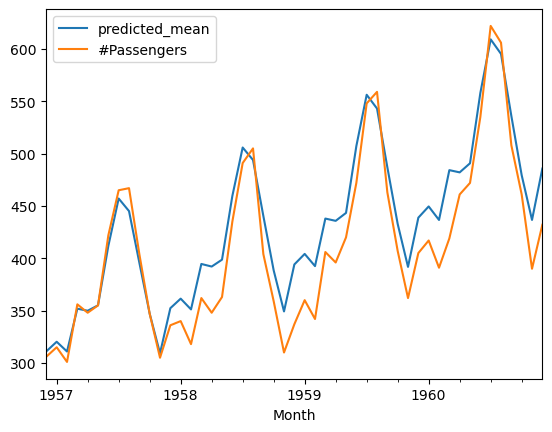

In [22]:
predction.plot(legend=True)
X_test["#Passengers"].plot(legend=True)

In [23]:
import math
from sklearn.metrics import mean_squared_error

In [24]:
trainScore=math.sqrt(mean_squared_error(X_train['#Passengers'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["#Passengers"],predction))
trainScore,testScore

(16.142751214053153, 29.49357226833754)

In [25]:
forcast=result.predict(start=len(df),
                      end=(len(df)-1)+3*12,
                      typ="levels").rename('Forecust')

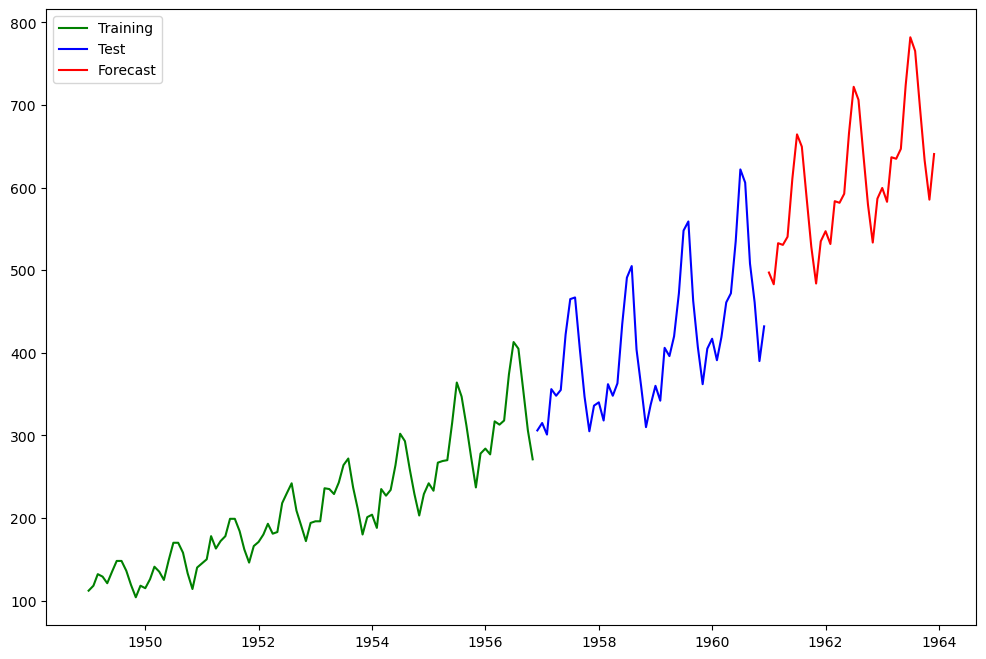

In [26]:
plt.figure(figsize=(12,8))
plt.plot(X_train["#Passengers"],label="Training",color='green')
plt.plot(X_test["#Passengers"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")
